# Seaborn Distribution Plots
[Seaborn Documentation](https://seaborn.pydata.org/)  
[Seaborn References](https://seaborn.pydata.org/examples/index.html)

In [1]:
import seaborn as sns
%matplotlib inline

## `sns.load_dataset({set name})` : load preloaded data

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `sns.distplot({column})` : distribution plot
>* `kde` : the line showing the overall trend (kde plot)
>* `bins` : assign the number of bins

<AxesSubplot:xlabel='total_bill'>

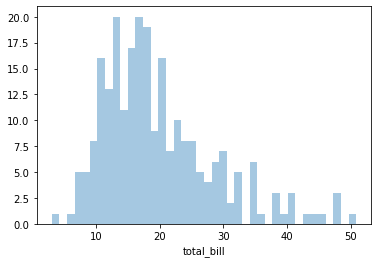

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins=40)

## `sns.jointplot()` : compare two distributions
> `x, y` : column name by string  
> `data` : data set   
> `kind` : type of plot e.g. 'hex', 'reg'

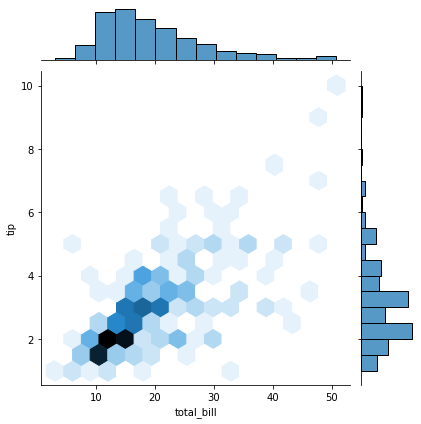

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

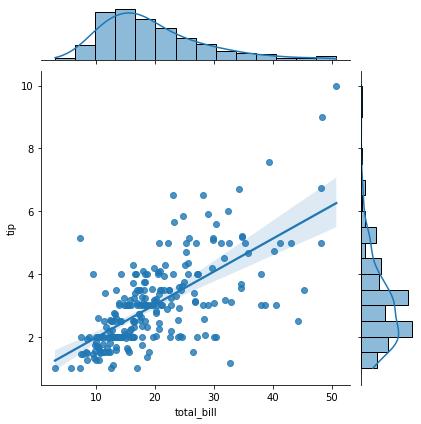

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

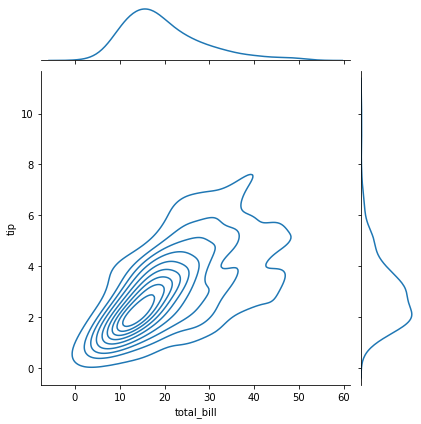

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

## `sns.pairplot()` : calls plots for every kind of variable  
> `hue({categorical variable})` : show the data based on their categorical variable  
> `palette({palette style})` : color style

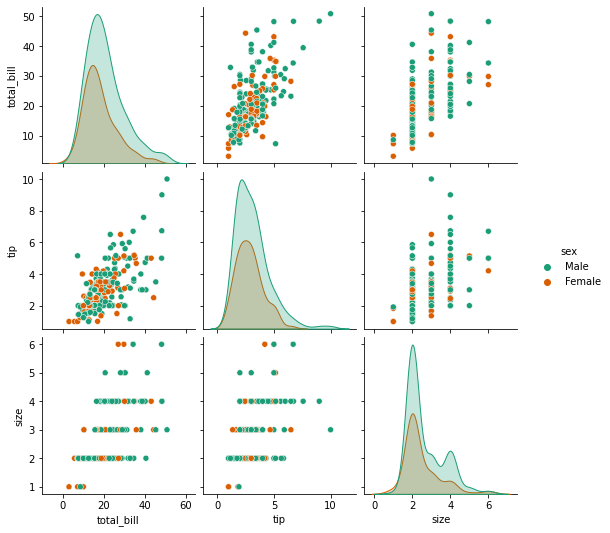

In [20]:
sns.pairplot(tips, hue='sex', palette='Dark2')

## `sns.rugplot({column})` : draws a dashmark for one single variable

<AxesSubplot:xlabel='total_bill'>

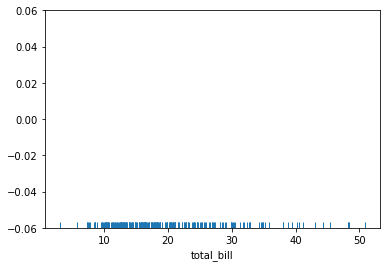

In [24]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

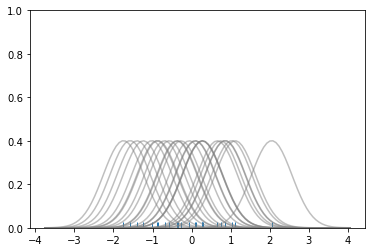

In [25]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

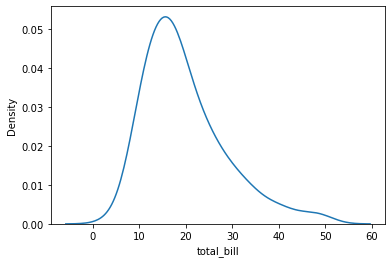

In [26]:
sns.kdeplot(tips['total_bill'])